**Linear Models**

This notebook is heavily based on Chapter 4 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow, 1st edition.


# Setup

First, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "linear"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Linear Least Squares solved with the Pseudo Inverse

This is linear regression with a sum of squared error. First, we produce noisy data points under the assumption that we would like to fit a function y = f(x). Caveat: This is not ideal form if our goal is to fit a curve to features of an image.

In [2]:
import numpy as np

nSamples = 100
sigmaN = 1.0
meanN = 0.0;

betaP = np.array([1,1.5])

# Generate nSamples x-values at random from 0 to 10
xVal = 10 * np.random.rand(nSamples, 1)
X = np.c_[np.ones((nSamples, 1)), xVal]
# add a normal distributed error offset to y of sigmaN and meanN 
y = X.dot(betaP[:,None]) + sigmaN * np.random.randn(nSamples, 1) + meanN
print('Sample size X: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))


Sample size X: 100 x 2 and label size 100


Saving figure generated_data_plot


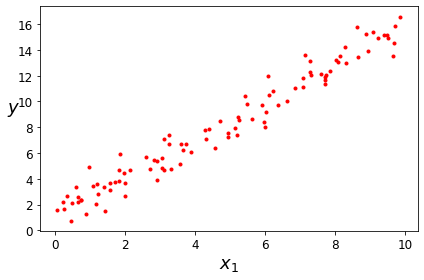

In [3]:
plt.plot(X[:,1], y, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0, 10, 0, 15])
save_fig("generated_data_plot")
plt.show()

Use numpy to calculate Pseudo inverse $\mathbf{X}^+ = \left( \mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T$ and then ${\mathbf \theta} = \mathbf{X}^{+} \mathbf{y}$ 

In [4]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('Parameters that minimize the SSE       : theta0 = {0} and theta1 = {1}'.format(theta_best[0,0],theta_best[1,0]))
print('Parameters used to generate the samples: beta0 = {0} and beta1 = {1}'.format(betaP[0],betaP[1]))


Parameters that minimize the SSE       : theta0 = 1.2150961575467476 and theta1 = 1.4540226772876974
Parameters used to generate the samples: beta0 = 1.0 and beta1 = 1.5


Draw the line that we have just estimated

Saving figure linear_model_predictions


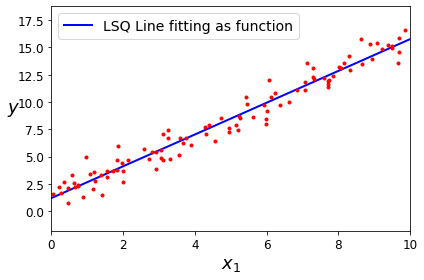

In [5]:
xEnds = np.array([[0], [10]])
Xe = np.c_[np.ones((2, 1)), xEnds]  # add x0 = 1 to each instance
y_pred = Xe.dot(theta_best)

plt.show()
plt.plot(Xe[:,1], y_pred, "b-", linewidth=2, label="LSQ Line fitting as function")
plt.plot(X[:,1], y, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([xEnds[0], xEnds[1], y_pred[0]-3*sigmaN,y_pred[1]+3*sigmaN])
save_fig("linear_model_predictions")
plt.show()

**SciKit Learn**: 
The `LinearRegression` class in scikit learn is based on the pseudoinverse, which ultimately relies on the SVD matrix decomposition of $\mathbf{X}$. It works even when the PseudoInverse fails, i.e., the number of samples $n$ is smaller than the number of features $m$ or when some features are linear combinations of other features (in these cases, $\mathbf{X}^T \mathbf{X}$ is not invertible). This would only occur in our example with a single sample or multiple samples with all samples with the same x value. 

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Same result as before but with sklearn: theta0 = {0} and theta1 = {1}'.format(lin_reg.intercept_, lin_reg.coef_[0,1]))
print('Parameters use the generate the samples: beta0 = {0} and beta1 = {1}'.format(betaP[0],betaP[1]))

Same result as before but with sklearn: theta0 = [1.21509616] and theta1 = 1.4540226772876965
Parameters use the generate the samples: beta0 = 1.0 and beta1 = 1.5


# Polynomial regression

Linear model and linear least squares refers to the linearity in the model parameters $\theta$ and not how the features are used.

In [7]:
betaPQ = np.array([-5,1.5,0.5])

# Use Xval values from above but use a different underlying function
XQ = np.c_[np.ones((nSamples, 1)), xVal, xVal*xVal]

# add a normal distributed error offset to y of sigmaN and meanN 
yQ = XQ.dot(betaPQ[:,None]) + sigmaN * np.random.randn(nSamples, 1) + meanN
print('Sample size X: {0} x {1} and label size {2}'.format(XQ.shape[0],XQ.shape[1],yQ.shape[0]))


Sample size X: 100 x 3 and label size 100


Saving figure quadratic_data_plot


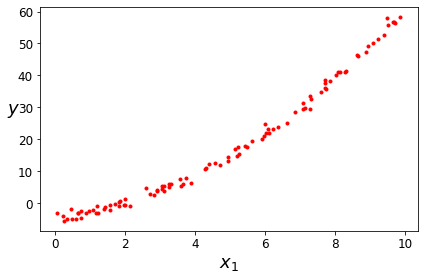

In [8]:
plt.plot(XQ[:,1], yQ, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0, 10, 0, 15])
save_fig("quadratic_data_plot")
plt.show()


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(XQ, yQ)
lin_reg.intercept_, lin_reg.coef_
print('Linear regression for quadratic function with sklearn: theta0 = {0}, theta1 = {1} and theta2 = {2}'.
      format(lin_reg.intercept_, lin_reg.coef_[0,1], lin_reg.coef_[0,2]))

Linear regression for quadratic function with sklearn: theta0 = [-4.45515841], theta1 = 1.1660851967224068 and theta2 = 0.5344051520343205


Saving figure quadratic_predictions_plot


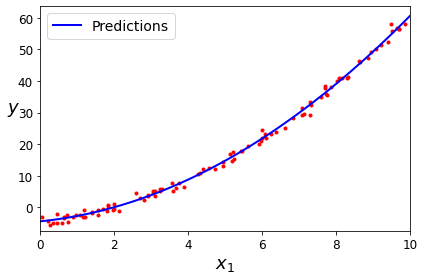

In [10]:
xNew=np.linspace(0, 10, 100).reshape(100, 1)
# X_new_poly = poly_features.transform(X_new)
yNew = lin_reg.predict(np.c_[np.ones(xNew.shape), xNew, xNew*xNew])
plt.plot(XQ[:,1], yQ, "r.")
plt.plot(xNew, yNew, "b-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.axis([xEnds[0], xEnds[1], yNew[0]-3*sigmaN,yNew[-1]+3*sigmaN])
save_fig("quadratic_predictions_plot")
plt.show()

We could use PolynomialFeatures from sklean.processing to automatically calculate higher order features. This is much more convenient for higher order polynomials.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(xVal)
print('Example for x={0} we get features {1}'.format(xVal[0], X_poly[0] ))

Example for x=[3.74540119] we get features [ 3.74540119 14.02803006]


Saving figure high_degree_polynomials_plot


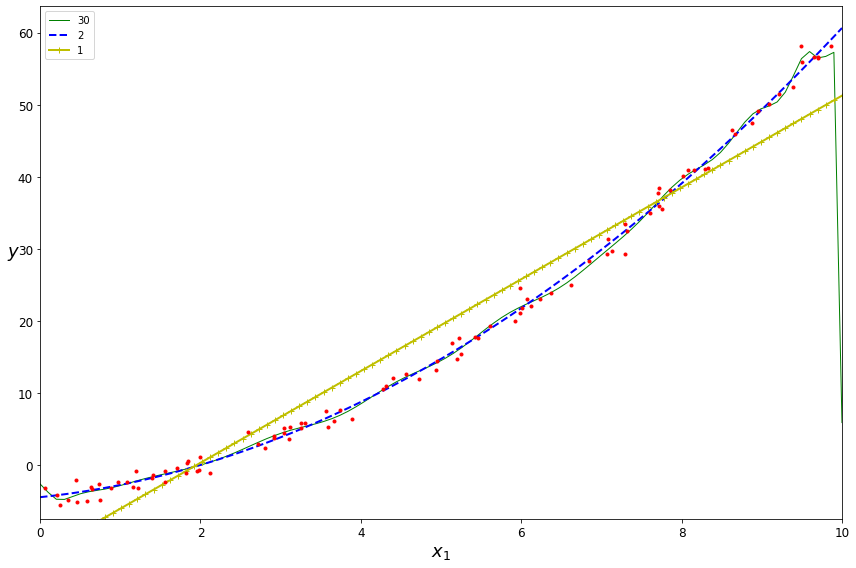

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(12, 8))

for style, width, degree in (("g-", 1, 30), ("b--", 2, 2), ("y-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(xVal, yQ)
    y_newbig = polynomial_regression.predict(xNew)
    plt.plot(xNew, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(xVal, yQ, "r.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([xEnds[0], xEnds[1], yNew[0]-3*sigmaN,yNew[-1]+3*sigmaN])
save_fig("high_degree_polynomials_plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


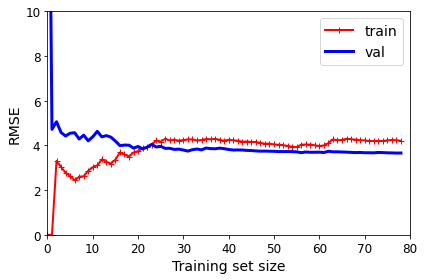

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, xVal, yQ)
plt.axis([0, 80, 0, 10])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Saving figure learning_curves_plot


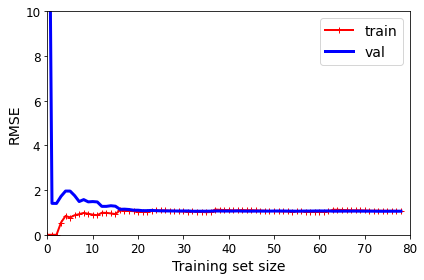

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, xVal, yQ)
plt.axis([0, 80, 0, 10])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularized models

Saving figure ridge_regression_plot


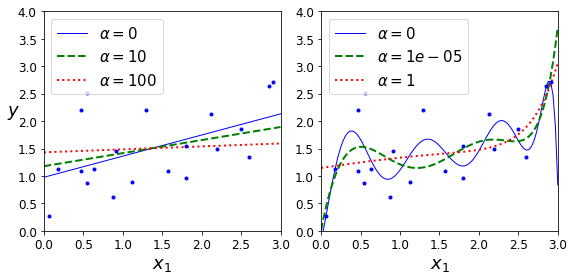

In [16]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Saving figure lasso_regression_plot


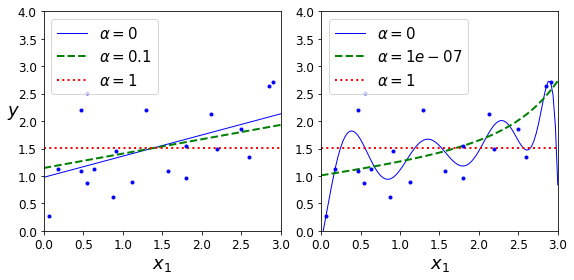

In [17]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

save_fig("lasso_regression_plot")
plt.show()

Saving figure SGD_error


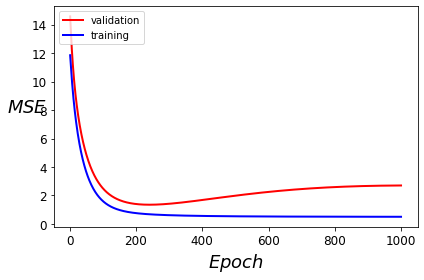

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.base import clone

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(# max_iter=1, warm_start=True, # use partial fit_instead
                       penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
val_error_arr = np.zeros((1000,1));
train_error_arr = np.zeros((1000,1));
for epoch in range(1000):
    sgd_reg.partial_fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_error_arr[epoch] = mean_squared_error(y_train, y_train_predict)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error =  mean_squared_error(y_val, y_val_predict);
    val_error_arr[epoch] = val_error;
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
plt.plot(np.linspace(1,1000,1000), val_error_arr, "r-", linewidth=2,label="validation")
plt.plot(np.linspace(1,1000,1000), train_error_arr, "b-", linewidth=2,label="training")
plt.legend(loc="upper left")
plt.xlabel("$Epoch$", fontsize=18)
plt.ylabel("$MSE$", rotation=0, fontsize=18)
save_fig("SGD_error")
plt.show()

In [19]:
best_epoch, best_model, minimum_val_error

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', penalty=None,
              random_state=42),
 1.351311051245387)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Use a simple linear model with two parameters $\theta_1$ and $\theta_2$. We have three data points and the true model is $\theta_1 = 2$ and $\theta_2 = 0.5$. We use an arbitrary startpoint of $\theta_1 = 0.25$ and $\theta_2 = -1$ for our batch gradient descent optimization.   

In [21]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [22]:
np.sign(t_init)

array([[ 1.],
       [-1.]])

We want to plot the optimization path and the value of the regularization term as the gradient descent reaches its minimum.

Saving figure lasso_vs_ridge_plot


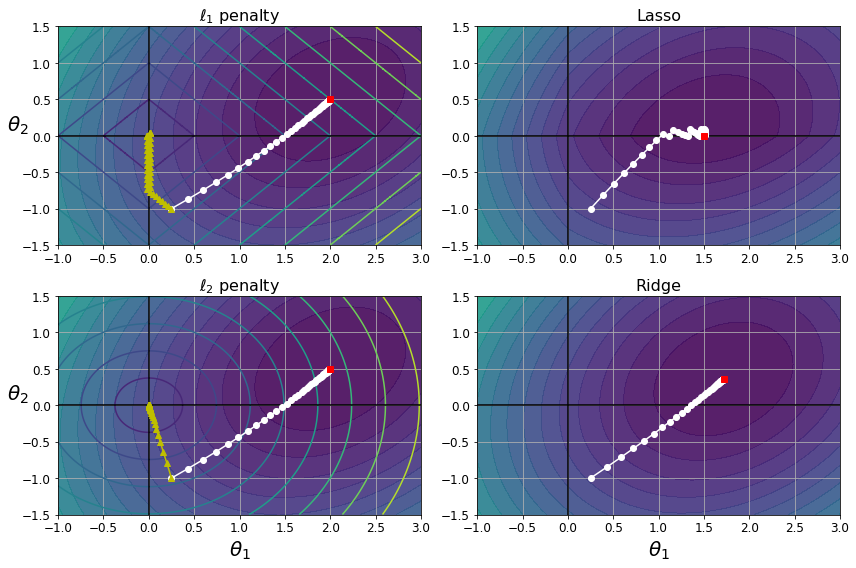

In [23]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta
        #if core < 0.1:
        #    print(theta.T,gradients.T)
            
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()

In the above figures, we see on the left the path taken by batch gradient descent. The white trajectory is the optimization path without regularization while the yellow trajectory is **just** the regularization with $\lambda = 1/3$ and $\lambda = 1$, respectively. (Note that these parameters are just picked such that the optimization of the regularization term uses a similar number of steps to converge than without regularization.)
On the right is the path of the parameters with regularization $\lambda = 0.5$ and $\lambda = 0.1$, respectively. Note that as expected the parameters found with regularization are not the parameters that we had used to calculate the data (see left) but rather weighted with the regularization term. Not that L1 penalty makes $\theta_2 = 0$ while the L2 penalty causes both parameters to be too small. Note also the three different contours: The error of the true model on the left in shades of blue the error of the regularized model on the right, plus the lines of the regularization on the left.

# Logistic regression

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()